# Polynomial Regression
As shown in our report, given data `data` = $\{(x_1, y_1),\dots, (x_n, y_n)\}$, we calculate $X$ given as
\begin{equation}
X = \begin{bmatrix}
		1      & x_1    & \dots  & x_1^m  \\
		1      & x_2    & \dots  & x_2^m  \\
		\vdots & \vdots & \vdots & \vdots \\
		1      & x_n    & \dots  & x_n^m
	\end{bmatrix}
\end{equation}
Then we have our estimate (our final answer) of $B$ as
\begin{equation}
B = (X^TX)^{-1}X^TY
\end{equation}
    

Importing all the required modules: `numpy`, `matplotlib`, `pandas` and the
training data

In [28]:
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt("train.csv",
                            delimiter=",",
                            skip_header=1,
                            usecols=(1,2))

In [97]:
class Regression:
    def __init__(self, data):
        self.data = data
        self.x = data[:, 0]
        self.Y = data[:, 1]

    def fit(self, m):
        self.m = m
        # calculates X from [x_1, x_2, ..., x_n]
        X = np.vstack([np.ones_like(self.x)] + 
                      [self.x**i for i in range(1, self.m+1)]).T
        # B = (X'X)^-1 X'y
        self.B = np.linalg.inv(X.T @ X) @ X.T @ self.Y
    
    def test(self, test_data):
        self.test_data = test_data
        self.test_x = test_data[:, 0]
        self.test_Y = test_data[:, 1]
        self.test_X = np.vstack([np.ones_like(self.test_x)] + 
                                [self.test_x**i for i in range(1, self.m+1)]).T
        return np.sum((self.test_Y-self.test_X @ self.B)**2/len(self.test_Y))

    def evaluate(self, x):
        return np.sum([x**i * self.B[i] for i in range(0, self.m+1)], axis=0)

    def get_ssrs(self, which_ssr, it):
        ssrs = np.array([])
        for i in it:
            self.fit(i)
            ssrs = np.append(ssrs, self.test(which_ssr))
        return ssrs

For testing data, we have
\begin{equation}
    SS_R = \text{sum}(Y-XB)^2
\end{equation}
Where squaring is just individual term squaring. Sum is sum of all elements of
matrix

Let's now divide our given `data` into training (`train_data`) and testing data
(`test_data`). The way we do this actually matters but I'm going to take a 
random 10% of the data.

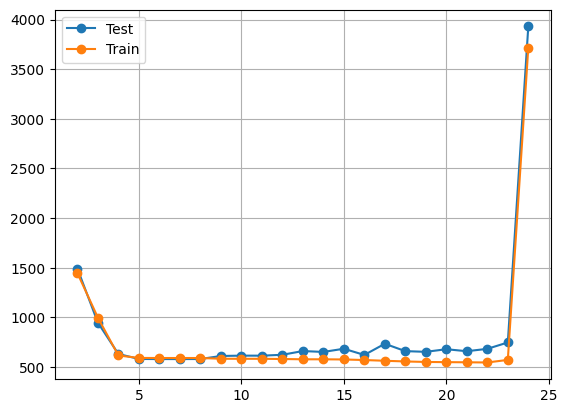

In [181]:
test_indices = np.random.choice(data.shape[0], int(data.shape[0]/10), replace=False)
train_indices = np.setdiff1d(np.arange(data.shape[0]), test_indices)
test_data = data[test_indices]
train_data = data[train_indices]

where_draw = np.arange(2, 25)
training = Regression(train_data)
test_ssrs = training.get_ssrs(test_data, where_draw)
train_ssrs = training.get_ssrs(train_data, where_draw)

plt.grid(True)
plt.plot(where_draw, test_ssrs, label="Test", marker="o")
plt.plot(where_draw, train_ssrs, label="Train", marker="o")
plt.legend()